# BIBLIOTECAS QUE FORAM INSTALADAS

pip install -U WordCloud

pip install -U spacy

pip install -U PyPDF2

pip install -U nltk

pip install -U gensim

pip install -U pyldavis

# BIBLIOTECAS IMPORTADAS

In [1]:
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
import unicodedata
import PyPDF2
import re
import gensim
import nltk
import spacy
import regex
import gensim.models.keyedvectors as word2vec
from gensim.models import LsiModel
from gensim import corpora as corpora
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from collections import Counter
from nltk.probability import FreqDist
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from nltk.stem.snowball import SnowballStemmer as Stemmer
from nltk.util import ngrams
from nltk import ngrams
from pprint import pprint
from wordcloud import WordCloud
nltk.download('stopwords')
import time

# FERRAMENTAS PARA PLOTAGEM
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viviane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# CONFIGURANDO A STOP_WORDS E ACRESCENTANDO NOVOS TERMOS

In [2]:
#CONFIGURANDO STOP_WORDS PARA PORTUGUÊS

stop_words = set(stopwords.words('portuguese'))

stop_words_us =  set(stopwords.words('english'))

# VERIFICAR stemmer = Stemmer("portuguese") # see nltk.stem.snowball doc

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['é','senão','quanto','outros','sobre','ser','ainda','quais','desse','assim','tal','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se','nesse','nessa','neste','nesta']


stop_words.update(new_stopwords)
new_stopwords_list = set(stop_words)

# FUNÇÕES CRIADAS

In [3]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS
def conversao_termos(texto):
    stx = re.sub(" ci "," ciência da informação ",str(texto.lower()))
    stx = re.sub(" gic "," gestão da informação e conhecimento ",str(stx.lower()))
    stx = re.sub(" universidade federal da bahia "," ufba ",str(texto.lower()))
    stx = re.sub(" universidade federal da paraíba "," ufpb ",str(texto.lower()))
    stx = re.sub(" universidade federal de santa caratina "," ufsc ",str(texto.lower()))
    stx = re.sub(" universidade federal de minas gerais "," ufmg ",str(texto.lower()))
    stx = re.sub(" universidade estadual de londrina  "," uel ",str(texto.lower()))
    stx = re.sub(" universidade federal fluminense "," uff ",str(texto.lower()))
    stx = re.sub(" universidade federal de ouro preto "," ufop ",str(texto.lower()))
    stx = re.sub(" universidade federal de pernambuco "," ufpe ",str(texto.lower()))
    stx = re.sub(" universidade federal de sergipe "," ufs ",str(texto.lower()))
    stx = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",str(texto.lower()))
    stx = re.sub(" universidade federal do rio de janeiro "," ufrj ",str(texto.lower()))
    stx = re.sub(" universidade federal de são carlos "," ufscar ",str(texto.lower()))
    stx = re.sub(" universidade de brasília "," unb ",str(texto.lower()))
    stx = re.sub(" universidade estadual paulista "," unesp ",str(texto.lower()))
    stx = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",str(texto.lower()))
    stx = re.sub(" universidade de são paulo "," usp ",str(texto.lower()))
    stx = re.sub(" universidade cândido mendes "," ucan ",str(texto.lower()))
    stx = re.sub(" universidade estadual do norte fluminense "," uenf ",str(texto.lower()))
    stx = re.sub(" universidade do estado do rio de janeiro "," uerj ",str(texto.lower()))
    stx = re.sub(" universidade federal do ceará"," ufc ",str(texto.lower()))
    stx = re.sub(" universidade federal de campina grande "," ufcg ",str(texto.lower()))
    stx = re.sub(" universidade federal de goiás"," ufg ",str(texto.lower()))
    stx = re.sub(" universidade federal de juiz de fora "," ufjf ",str(texto.lower()))
    stx = re.sub(" universidade federal do maranhão "," ufma ",str(texto.lower()))
    stx = re.sub(" universidade federal do pará "," ufpa ",str(texto.lower()))
    stx = re.sub(" universidade federal do paraná "," ufpr ",str(texto.lower()))
    stx = re.sub(" universidade federal do rio grande do norte "," ufrn ",str(texto.lower()))
    stx = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",str(texto.lower()))
    stx = re.sub(" universidade estadual de campinas "," unicamp ",str(texto.lower()))
    stx = re.sub(" universidade do vale do rio dos sinos "," unisinos ",str(texto.lower()))
    stx = re.sub(" ccn "," catálogo coletivo nacional ",str(texto.lower()))
    stx = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",str(texto.lower()))
    stx = re.sub(" scientific electronic library online "," scielo",str(texto.lower()))
    stx = re.sub(" snpq "," sistema nacional de pós-graduação",str(texto.lower()))
    stx = re.sub(" mec "," ministério da educação ",str(texto.lower()))
    stx = re.sub(" serviço central de informação bibliográfica "," scib ",str(texto.lower()))
    stx = re.sub(" sesi "," serviço social da indústria ",str(texto.lower()))
    stx = re.sub(" serviço social da indústria "," sesi ",str(texto.lower()))
    stx = re.sub(" serviço nacional de aprendizagem comercial "," senac ",str(texto.lower()))
    stx = re.sub(" serviço nacional de aprendizagem industrial "," senai ",str(texto.lower()))
    stx = re.sub(" serviço social do comércio "," sesc ",str(texto.lower()))
    stx = re.sub(" onu "," organização das nações unidas ",str(texto.lower()))
    stx = re.sub(" snad "," secretária nacional de políticas anti-drogas ",str(texto.lower()))
    stx = re.sub(" zpd "," zona de desenvolvimento proximal ",str(texto.lower()))
    stx = re.sub(" sdr "," zona de desenvolvimento real ",str(texto.lower()))
    stx = re.sub(" abc "," academia brasileira de ciência ",str(texto.lower()))
    stx = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",str(texto.lower()))
    stx = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",str(texto.lower()))
    stx = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",str(texto.lower()))
    stx = re.sub(" fundação de amparo às pesquisas "," faps ",str(texto.lower()))
    stx = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",str(texto.lower()))
    stx = re.sub(" ies "," instituição de ensino superior ",str(texto.lower()))
    stx = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",str(texto.lower()))
    stx = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(texto.lower()))
    stx = re.sub(" jcr "," journal citation reports ",str(texto.lower()))
    stx = re.sub(" ppg "," programa de pós-graduação ",str(texto.lower()))
    stx = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",str(texto.lower()))
    stx = re.sub(" programa de pós-graduação em sociologia "," ppgs ",str(texto.lower()))
    stx = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",str(texto.lower()))
    stx = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",str(texto.lower()))
    stx = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",str(texto.lower()))
    stx = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",str(texto.lower()))
    stx = re.sub(" sci "," science citation index ",str(texto.lower()))
    stx = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",str(texto.lower()))
    stx = re.sub(" associação brasileira de normas técnicas "," abnt ",str(texto.lower()))
    stx = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",str(texto.lower()))
    stx = re.sub(" enade "," exame nacional de desempenho ",str(texto.lower()))
    stx = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",str(texto.lower()))
    stx = re.sub(" pln "," processamento de linguagem natural ",str(texto.lower()))
    stx = re.sub(" tcc "," trabalho de conclusão de curso ",str(texto.lower()))
    stx = re.sub(" ldb "," lei de diretrizes e bases ",str(texto.lower()))
    stx = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",str(texto.lower()))
    stx = re.sub(" gpl "," general public licence ",str(texto.lower()))
    stx = re.sub(" idh "," índice de desenvolvimento humano ",str(texto.lower()))
    stx = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",str(texto.lower()))
    stx = re.sub(" instituto de ciência da informação "," ici ",str(texto.lower()))
    stx = re.sub(" ong "," organização não-governamental ",str(texto.lower()))
    stx = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",str(texto.lower()))
    stx = re.sub(" tic "," tecnologia de informação e comunicação ",str(texto.lower()))
    stx = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",str(texto.lower()))
    stx = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",str(texto.lower()))
    stx = re.sub(" ala "," american library association ",str(texto.lower()))
    stx = re.sub(" crm "," customer relationship management ",str(texto.lower()))
    stx = re.sub(" fgv "," Fundação Getúlio Vargas ",str(texto.lower()))
    stx = re.sub(" international federation of library associations and institutions "," ifla ",str(texto.lower()))
    stx = re.sub(" library and informations science abstracts "," lisa ",str(texto.lower()))
    stx = re.sub(" ssd "," sistema de suporte à decisão ",str(texto.lower()))
    stx = re.sub(" sad "," sistema de apoio à decisão ",str(texto.lower()))
    stx = re.sub(" sig "," sistema de informação gerencial ",str(texto.lower()))
    stx = re.sub(" ti "," tecnologia da informação ",str(texto.lower()))
    stx = re.sub(" world wide web consortium "," w3c ",str(texto.lower()))
    stx = re.sub(" iso "," international organization for standardization ",str(texto.lower()))
    stx = re.sub(" fiocruz "," fundação oswaldo cruz ",str(texto.lower()))
    stx = re.sub(" npd "," núcleo de pesquisa e documentação ",str(texto.lower()))
    stx = re.sub(" ftp "," file transfer protocol ",str(texto.lower()))
    stx = re.sub(" oc "," organização do conhecimento ",str(texto.lower()))
    stx = re.sub(" oi "," organização da informação ",str(texto.lower()))
    stx = re.sub(" osi "," open society institute ",str(texto.lower()))
    stx = re.sub(" owl "," web ontology language ",str(texto.lower()))
    stx = re.sub(" plos "," public library of science ",str(texto.lower()))
    stx = re.sub(" jstor "," journal storage ",str(texto.lower()))
    stx = re.sub(" kos "," sistemas de organização do conhecimento ",str(texto.lower()))
    stx = re.sub(" soc "," sistemas de organização do conhecimento ",str(texto.lower()))
    stx = re.sub(" hypertext markup language limguagem "," html ",str(texto.lower()))
    stx = re.sub(" ala "," american library association ",str(texto.lower()))
    stx = re.sub(" c&t "," ciência e tecnologia ",str(texto.lower()))
    stx = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",str(texto.lower()))
    stx = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",str(texto.lower()))
    stx = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",str(texto.lower()))
    stx = re.sub(" ead "," educação à distância ",str(texto.lower()))
    stx = re.sub(" ict "," informação, ciência e tecnologia ",str(texto.lower()))
    stx = re.sub(" cc "," ciência da computação ",str(texto.lower()))
    stx = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",str(texto.lower()))
    stx = re.sub(" ia "," inteligência artificial ",str(texto.lower()))
    stx = re.sub(" ai "," arquitetura da informação ",str(texto.lower()))
    stx = re.sub(" international standard book number "," isbn ",str(texto.lower()))
    stx = re.sub(" international standard serial number "," issn ",str(texto.lower()))
    stx = re.sub(" lod "," linked open data ",str(texto.lower()))
    stx = re.sub(" marc "," machine readable cataloging ",str(texto.lower()))
    stx = re.sub(" rdf "," resource description framework ",str(texto.lower()))
    stx = re.sub(" uri "," uniform resource identifier ",str(texto.lower()))
    stx = re.sub(" uml "," unified modeling language ",str(texto.lower()))
    stx = re.sub(" ufo "," unified foundational ontology ",str(texto.lower()))
    stx = re.sub(" xml "," extensible markup language ",str(texto.lower()))
    stx = re.sub(" gic "," gestão da informação e do conhecimento ",str(texto.lower()))
    stx = re.sub(" cms "," content management system ",str(texto.lower()))
    stx = re.sub(" eci "," escola de ciência da informação ",str(texto.lower()))
    stx = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",str(texto.lower()))
    stx = re.sub(" isi "," institute for scientific information ",str(texto.lower()))
    stx = re.sub(" oai "," open archives iniciative ",str(texto.lower()))
    stx = re.sub(" ojs "," open journal systems ",str(texto.lower()))
    stx = re.sub(" universidade federal de viçosa "," ufv ",str(texto.lower()))
    stx = re.sub(" ri "," recuperação da informação ",str(texto.lower()))
    stx = re.sub(" sri "," sistema de recuperação da informação ",str(texto.lower()))
    stx = re.sub(" dc "," dublin core ",str(texto.lower()))
    stx = re.sub(" mdi "," multiple document interface ",str(texto.lower()))
    stx = re.sub(" ocr "," optical character recognition ",str(texto.lower()))
    stx = re.sub(" aoi "," arquitetura e organização da informação ",str(texto.lower()))
    stx = re.sub(" bci "," biblioteconomia e ciência da informação ",str(texto.lower()))
    stx = re.sub(" bn "," biblioteca nacional ",str(texto.lower()))
    stx = re.sub(" bu "," biblioteca universitária ",str(texto.lower()))
    stx = re.sub(" sibi "," sistema integrado de bibliotecas ",str(texto.lower()))
    stx = re.sub(" annual review of information science and technology "," arist ",str(texto.lower()))
    stx = re.sub(" american society for information science and Technology "," asist ",str(texto.lower()))
    stx = re.sub(" information science and technology abstracts "," ista ",str(texto.lower()))
    stx = re.sub(" cne "," conselho nacional de educação ",str(texto.lower()))
    stx = re.sub(" ics "," informação cultura e sociedade ",str(texto.lower()))
    stx = re.sub(" it "," informação e tecnologia ",str(texto.lower()))
    stx = re.sub(" oui "," organização e uso da informação ",str(texto.lower()))
    stx = re.sub(" poi "," produção e organização da informação ",str(texto.lower()))
    stx = re.sub(" lc "," linguagem cinzenta ",str(texto.lower()))
    stx = re.sub(" ld "," linguagem documentária ",str(texto.lower()))
    stx = re.sub(" ln "," linguagem natural ",str(texto.lower()))
    stx = re.sub(" rc "," representação do conhecimento ",str(texto.lower()))
    stx = re.sub(" ri "," recuperação da informação ",str(texto.lower()))
    stx = re.sub(" cdd "," classificação decimal de dewey ",str(texto.lower()))
    stx = re.sub(" cdu "," classificação decimal universal ",str(texto.lower()))
    stx = re.sub(" cepe "," conselho de extensão e pesquisa ",str(texto.lower()))
    stx = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",str(texto.lower()))
    return stx


In [4]:
#FUNÇÃO QUE LÊ O PDF E RETORNA SEU CONTEÚDO
def LerPdf(arquivo):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
 
    with open(arquivo, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
 
        text = fake_file_handle.getvalue()
 
    # close open handles
    converter.close()
    fake_file_handle.close()
 
    if text:
        return text

In [5]:
#FUNÇÃO BIGRAMA E TRIGRAMA
def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [6]:
inicio = time.time()
arq = "0352"

if not arq.endswith('.pdf'):
    arq = arq + '.pdf'

stx = LerPdf(arq)
fim = time.time()
print('tempo de execução:'  +str(fim - inicio))

tempo de execução:11.981931686401367


In [7]:
#FAZER A LIMPREZA DE E-MAIL, LINHAS EM BRANCO E CARACTERES CONSIDERADOS LIXO
stx = re.sub('\n', '', stx)
stx = re.sub('_', '', stx)
stx = re.sub('-se', '', stx)
stx = regex.sub(r'[!-,.:-@\p{Ps}\p{Pe}]|(?<!\p{L})-|-(?!\p{L})', '', stx)
stx = conversao_termos(stx)

In [8]:
# TOKENIZE
word_tokens = word_tokenize(stx.replace('\n', '').lower(), language='portuguese')

In [9]:
#CRIANDO A STOP_WORDS EM PORTUGUES

filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words: 
        ch = w
        if not ch.isdigit():
            filtered_sentence.append(w)
stop_words = filtered_sentence

In [10]:
#CRIANDO A STOP_WORDS EM INGLES

filtered_sentence = [w for w in stop_words if not w in stop_words_us]
filtered_sentence = []
for w in stop_words:
    if w not in stop_words_us: 
        filtered_sentence.append(w)
stop_words = filtered_sentence

In [11]:
#JUNTANDO OS UNIGRAMAS, BIGRAMAS E TRIGRAMAS
xgramas = stop_words
xgramas = xgramas + bigramas(stop_words)
xgramas = xgramas + trigramas(stop_words)

# FREQUÊNCIAS

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM
fdist = FreqDist(xgramas)
fdist.pprint(10)
xfreq = fdist

FreqDist({'biblioteconomia': 326, 'curso': 275, 'número': 220, 'bibliotecários': 212, 'homens': 203, 'trabalho': 195, 'universidade': 190, 'mulheres': 189, 'profissão': 178, 'graduados': 163, ...})


In [13]:
# TERMOS COM MAIOR FREQUÊNCIA
fdist.most_common(30)

[('biblioteconomia', 326),
 ('curso', 275),
 ('número', 220),
 ('bibliotecários', 212),
 ('homens', 203),
 ('trabalho', 195),
 ('universidade', 190),
 ('mulheres', 189),
 ('profissão', 178),
 ('graduados', 163),
 ('gênero', 141),
 ('informação', 125),
 ('sexo', 124),
 ('federal', 123),
 ('cursos', 121),
 ('universidade_federal', 119),
 ('pesquisa', 114),
 ('anos', 114),
 ('–', 109),
 ('“', 106),
 ('”', 104),
 ('dados', 102),
 ('gráfico', 97),
 ('maior', 92),
 ('ciência', 83),
 ('décadas', 77),
 ('mercado', 76),
 ('sociedade', 74),
 ('ciência_informação', 72),
 ('longo', 71)]

# NUVEM DE PALAVRAS

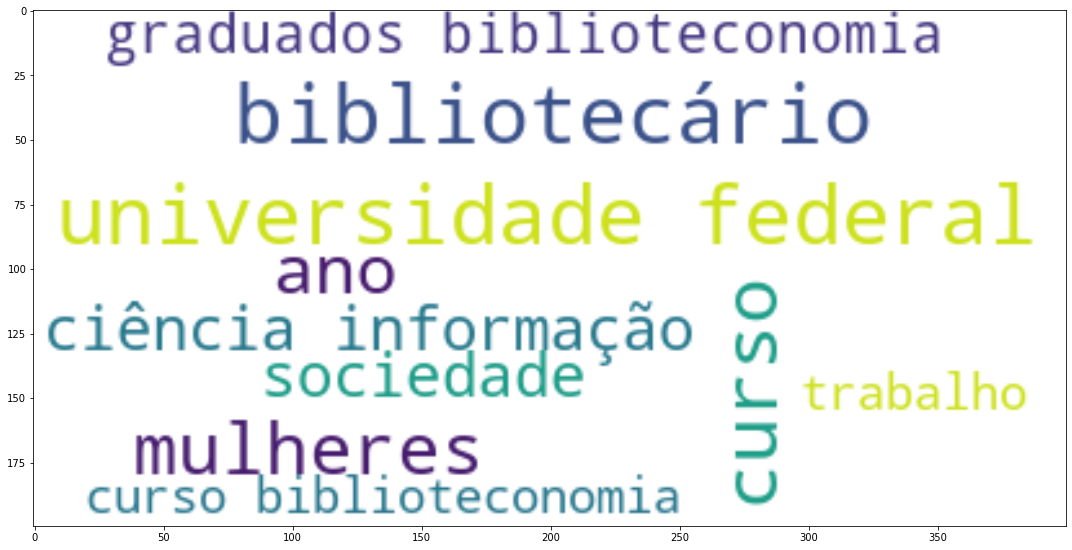

In [14]:
cleaned =  ' '.join(xgramas)
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()

In [15]:
#SALVAR IMAGEM DA NUVEM DE PALAVRAS
wordcloud.to_file("first_review.png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [16]:
# CRIANDO O DICIONARIO
dct = Dictionary([xgramas])

In [17]:
#CRIANDO O CORPUS
textos = [xgramas]
#frequencia das palavras
corpus = [dct.doc2bow(text) for text in textos]

# CRIANDO O MODELO LDA 

In [18]:
# MODELO LDA
lda_modelo = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dct,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
# IMPRIMINDO A QUANTIDADE DE TÓPICOS DEFINIDA NO MODELO
pprint(lda_modelo.print_topics())
doc_lda = lda_modelo[corpus]

[(0,
  '0.000*"biblioteconomia" + 0.000*"curso" + 0.000*"número" + 0.000*"homens" + '
  '0.000*"bibliotecários" + 0.000*"trabalho" + 0.000*"informação" + '
  '0.000*"profissão" + 0.000*"universidade" + 0.000*"”"'),
 (1,
  '0.000*"curso" + 0.000*"biblioteconomia" + 0.000*"bibliotecários" + '
  '0.000*"profissão" + 0.000*"homens" + 0.000*"graduados" + 0.000*"mulheres" + '
  '0.000*"número" + 0.000*"trabalho" + 0.000*"universidade"'),
 (2,
  '0.000*"número" + 0.000*"biblioteconomia" + 0.000*"curso" + '
  '0.000*"bibliotecários" + 0.000*"profissão" + 0.000*"universidade" + '
  '0.000*"mulheres" + 0.000*"sexo" + 0.000*"homens" + 0.000*"trabalho"'),
 (3,
  '0.000*"biblioteconomia" + 0.000*"curso" + 0.000*"universidade" + '
  '0.000*"bibliotecários" + 0.000*"graduados" + 0.000*"homens" + '
  '0.000*"número" + 0.000*"mulheres" + 0.000*"profissão" + 0.000*"gênero"'),
 (4,
  '0.000*"biblioteconomia" + 0.000*"curso" + 0.000*"trabalho" + '
  '0.000*"mulheres" + 0.000*"número" + 0.000*"universidade

# CRIANDO O MODELO LSI 

In [22]:
# CRIANDO O MODELO LSI
lsi_modelo = LsiModel(corpus, id2word=dct, num_topics=10)

# VISUALIZANDO
pprint(lsi_modelo.print_topics(num_words=10,num_topics=10))

[(0,
  '0.314*"biblioteconomia" + 0.265*"curso" + 0.212*"número" + '
  '0.204*"bibliotecários" + 0.195*"homens" + 0.188*"trabalho" + '
  '0.183*"universidade" + 0.182*"mulheres" + 0.171*"profissão" + '
  '0.157*"graduados"')]


# VISUALIZAÇÃO DE GRÁFICOS - LDA

In [23]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_modelo, corpus, dct)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
8     -0.077709  0.0       1        1  99.999954
2      0.009540  0.0       2        1   0.000008
3      0.009227 -0.0       3        1   0.000007
6      0.008926 -0.0       4        1   0.000006
5      0.008626  0.0       5        1   0.000005
4      0.008696 -0.0       6        1   0.000005
9      0.008449  0.0       7        1   0.000005
1      0.008348  0.0       8        1   0.000004
7      0.008302  0.0       9        1   0.000004
0      0.007595 -0.0      10        1   0.000002, topic_info=      Category          Freq                   Term       Total  loglift  \
3593   Default  3.090000e+02        biblioteconomia  309.000000  30.0000   
8122   Default  2.610000e+02                  curso  261.000000  29.0000   
22130  Default  2.080000e+02                 número  208.000000  28.0000   
4280   Default  2.010000e+02         bibliotecários  201.000000  27.0000   
16290  Default  1.920000e+02                 homens  192.000000  26.0000   
33300  Default  1.800000e+02           universidade  180.000000  25.0000   
32234  Default  1.850000e+02               trabalho  185.000000  24.0000   
20907  Default  1.790000e+02               mulheres  179.000000  23.0000   
26306  Default  1.690000e+02              profissão  169.000000  22.0000   
15354  Default  1.540000e+02              graduados  154.000000  21.0000   
15795  Default  1.330000e+02                 gênero  133.000000  20.0000   
33339  Default  1.120000e+02   universidade_federal  112.000000  19.0000   
17397  Default  1.180000e+02             informação  118.000000  18.0000   
8439   Default  1.140000e+02                 cursos  114.000000  17.0000   
13541  Default  1.160000e+02                federal  116.000000  16.0000   
29695  Default  1.170000e+02                   sexo  117.000000  15.0000   
24571  Default  1.080000e+02               pesquisa  108.000000  14.0000   
1328   Default  1.080000e+02                   anos  108.000000  13.0000   
34660  Default  1.030000e+02                      –  103.000000  12.0000   
35036  Default  9.800000e+01                      ”   98.000000  11.0000   
34865  Default  1.000000e+02                      “  100.000000  10.0000   
8647   Default  9.600000e+01                  dados   96.000000   9.0000   
15681  Default  9.200000e+01                gráfico   92.000000   8.0000   
19115  Default  8.700000e+01                  maior   87.000000   7.0000   
5985   Default  7.800000e+01                ciência   78.000000   6.0000   
10940  Default  7.300000e+01                décadas   73.000000   5.0000   
20116  Default  7.200000e+01                mercado   72.000000   4.0000   
5994   Default  6.800000e+01     ciência_informação   68.000000   3.0000   
30400  Default  7.000000e+01              sociedade   70.000000   2.0000   
8156   Default  6.600000e+01  curso_biblioteconomia   66.000000   1.0000   
...        ...           ...                    ...         ...      ...   
8122   Topic10  1.443999e-07                  curso  261.019318  -3.7505   
22130  Topic10  1.286696e-07                 número  208.837692  -3.6428   
16290  Topic10  1.252814e-07                 homens  192.725647  -3.5892   
17397  Topic10  1.093639e-07             informação  118.732079  -3.2407   
35036  Topic10  1.045887e-07                      ”   98.771156  -3.1013   
4280   Topic10  1.172388e-07         bibliotecários  201.324188  -3.6992   
32234  Topic10  1.123090e-07               trabalho  185.237442  -3.6589   
26306  Topic10  1.079926e-07              profissão  169.045364  -3.6066   
33300  Topic10  1.054299e-07           universidade  180.394196  -3.6956   
8439   Topic10  9.324208e-08                 cursos  114.903542  -3.3674   
34865  Topic10  9.007702e-08                      “  100.694702  -3.2699   
15795  Topic10  9.017470e-08                 gênero  133.928162  -3.5541   
19115  Topic10  8.338718e